In [31]:
import numpy as np
import keras
import pandas
from keras_tqdm import TQDMNotebookCallback
from sklearn import preprocessing

data = np.array(pandas.read_csv("~/S19-team2-project/new_trainingdata.csv", header=0))
## Have to drop all the rows that have nan values because they will not help with net
## clean out rows with nan values
data = data[~np.isnan(data).any(axis=1)]

print(data.shape)


(114, 9)


In [32]:
from sympy import *
init_printing(use_latex=True)

import matplotlib.pyplot as plt
%matplotlib inline

X = data[:,0:8]
X = preprocessing.scale(X)
print(X.shape)
display(X)

labels = data[:,8]
print(labels.shape)
display(labels)

Y = keras.utils.to_categorical(labels, len(np.unique(labels)))

(114, 8)


array([[-0.3092873 ,  0.44011108,  0.63664779,  0.1816632 , -1.49788926,
        -0.75873607, -1.98651828,  0.11548844],
       [-0.13867241,  0.03796099,  0.76509571, -0.20275434, -1.79786928,
        -1.13764933, -2.19837621,  0.62769181],
       [-0.07232217, -0.21795271,  0.10896985,  0.10558057, -1.74549182,
        -0.77921787, -0.82944808,  0.25936579],
       [ 0.33904929, -1.70517687, -1.22758282, -1.17447646, -0.98363779,
        -0.85090416,  1.58247291, -1.16789753],
       [-0.13867241, -1.59988666, -1.51919432, -1.17447646, -0.72651206,
        -0.27741382,  1.3217247 , -1.16789753],
       [-0.33772312, -1.86311217, -1.46451716, -1.49215485, -0.81222064,
        -1.13764933,  1.71284702, -0.84561226],
       [-0.47042359, -1.59988666, -1.17550934, -1.14457732, -0.86935969,
        -0.63584529,  1.06097648, -1.02977527],
       [ 0.12672854, -1.07343563, -1.44629144, -1.43609395, -0.94554509,
        -1.28102192,  0.73504121, -1.21393828],
       [-0.51189249, -0.5469846 

(114,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [33]:
input_size = X.shape[1]
output_size = Y.shape[1]
display(X.shape[1])

In [34]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(64,input_dim=8,activation='relu', bias_initializer=keras.initializers.Constant(value=0.01)))
model.add(keras.layers.Dense(64,input_dim=8,activation='sigmoid', bias_initializer=keras.initializers.Constant(value=0.01)))

model.add(keras.layers.Dense(3,activation='softmax'))
#categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 195       
Total params: 4,931
Trainable params: 4,931
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
history = model.fit(X, Y,
    batch_size=56, 
    epochs=100, 
    verbose=0,
    callbacks=[TQDMNotebookCallback()],
    validation_split = 0.2)


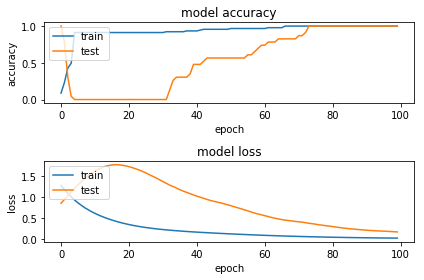

114/114 [==============================] - 0s 102us/step
Test loss: 0.05925530744226355
Test accuracy: 1.0


In [36]:
plt.figure(1)

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [38]:
model.save_weights('MLN.weights')
model.save('MLN.model')